<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [21]:
# https://www.datacareer.de/blog/accessing-ecb-exchange-rate-data-in-python/

In [1]:
import requests     # 2.18.4
import pandas as pd # 0.23.0
import io

In [2]:
# Building blocks for the URL
entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
resource = 'data'           # The resource for data queries is always'data'
flowRef ='EXR'              # Dataflow describing the data that needs to be returned, exchange rates in this case
key = 'D.CHF.EUR.SP00.A'    # Defining the dimension values, explained below

# Define the parameters
parameters = {
    'startPeriod': '2000-01-01',  # Start date of the time series
    'endPeriod': '2018-10-01'     # End of the time series
}

In [3]:
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
request_url = entrypoint + resource + '/'+ flowRef + '/' + key

# Make the HTTP request
response = requests.get(request_url, params=parameters)

# Check if the response returns succesfully with response code 200
print(response)

# Print the full URL
print(response.url)

<Response [200]>
https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A?startPeriod=2000-01-01&endPeriod=2018-10-01


In [4]:
# Print the first 1000 characters of the response
print(response.text[0:1000])

<?xml version="1.0" encoding="UTF-8"?><message:GenericData xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic" xsi:schemaLocation="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXMessage.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXCommon.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXDataGeneric.xsd">
<message:Header>
<message:ID>1d87887d-1bc4-4b3e-875c-9bd560d408df</message:ID>
<message:Test>false</message:Test>
<message:Prepared>2018-11-22T00:13:26.282+01:00</message:Prepared>
<message:Sender id="ECB"/>
<message:Structure structureID="

In [5]:
# Make the HTTP request again, now requesting for CSV format
response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
# Response succesful? (Response code 200)
print(response)

<Response [200]>


In [6]:
# Print the first 1000 characters to inspect the response
response.text[0:1000]

'KEY,FREQ,CURRENCY,CURRENCY_DENOM,EXR_TYPE,EXR_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,OBS_PRE_BREAK,OBS_COM,TIME_FORMAT,BREAKS,COLLECTION,COMPILING_ORG,DISS_ORG,DOM_SER_IDS,PUBL_ECB,PUBL_MU,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_AGENCY,SOURCE_PUB,TITLE,TITLE_COMPL,UNIT,UNIT_MULT\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-03,1.6043,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-04,1.6053,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-05,1.606,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro, 2:15 pm (C.E.T.)",CHF,0\r\nEXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-06,1.6068,A,,,,P1D,,A,,,,,,,,,,4,,4F0,,Swiss franc/Euro,"ECB reference exchange rate, Swiss fra

In [7]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [8]:
# Check the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 32 columns):
KEY                4859 non-null object
FREQ               4859 non-null object
CURRENCY           4859 non-null object
CURRENCY_DENOM     4859 non-null object
EXR_TYPE           4859 non-null object
EXR_SUFFIX         4859 non-null object
TIME_PERIOD        4859 non-null object
OBS_VALUE          4798 non-null float64
OBS_STATUS         4859 non-null object
OBS_CONF           238 non-null object
OBS_PRE_BREAK      0 non-null float64
OBS_COM            0 non-null float64
TIME_FORMAT        4859 non-null object
BREAKS             0 non-null float64
COLLECTION         4859 non-null object
COMPILING_ORG      0 non-null float64
DISS_ORG           0 non-null float64
DOM_SER_IDS        0 non-null float64
PUBL_ECB           0 non-null float64
PUBL_MU            0 non-null float64
PUBL_PUBLIC        0 non-null float64
UNIT_INDEX_BASE    0 non-null float64
COMPILATION        0 non-null flo

In [9]:
# Show the last 5 entries of the DataFrame
df.tail()

,KEY,FREQ,CURRENCY,CURRENCY_DENOM,EXR_TYPE,EXR_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,...,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_AGENCY,SOURCE_PUB,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
4854,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-25,1.1376,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4855,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-26,1.1369,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4856,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-27,1.1371,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4857,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-09-28,1.1316,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4858,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2018-10-01,1.1414,A,F,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0


In [10]:
# Inspect the prices. Do the mean, minimum and maximum make sense?
df['OBS_VALUE'].describe()

count    4798.000000
mean        1.379459
std         0.193938
min         0.981600
25%         1.205500
50%         1.467300
75%         1.547200
max         1.680300
Name: OBS_VALUE, dtype: float64

In [11]:
# Create a new DataFrame called 'ts'
ts = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
# 'TIME_PERIOD' was of type 'object' (as seen in df.info). Convert it to datetime first
ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
# Set 'TIME_PERIOD' to be the index
ts = ts.set_index('TIME_PERIOD')
# Print the last 5 rows to screen
ts.tail()

,OBS_VALUE
TIME_PERIOD,
2018-09-25,1.1376
2018-09-26,1.1369
2018-09-27,1.1371
2018-09-28,1.1316
2018-10-01,1.1414


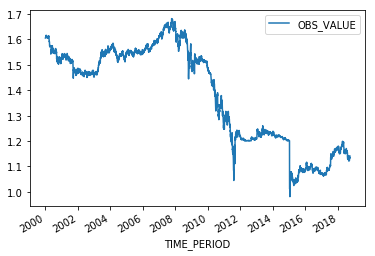

In [12]:
%matplotlib inline
ts.plot()

In [14]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandasdmx

    100% |████████████████████████████████| 51kB 1.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for jsonpath-rw ... done
  Stored in directory: /Users/adhiman/Library/Caches/pip/wheels/5c/00/9a/82822db383c2d96dcebf839786665a185f92d37e5026f9806f
Successfully built jsonpath-rw


In [15]:
from pandasdmx import Request

# Define the source
ecb = Request('ECB')

In [16]:
# Retrieve the data (we start at 2016, because are requesting a larger dataset (including other frequencies))
data_response = ecb.data(resource_id = 'EXR', key={'CURRENCY': ['CHF', 'EUR']}, params = {'startPeriod': '2016'})
data = data_response.data

In [17]:
# The data will be a pandaSDMC 'DataSet'
type(data)

pandasdmx.model.DataSet

In [18]:
# Show which frequencies are available ('D' is 'daily', you can probably guess the other ones)
set(s.key.FREQ for s in data.series)

{'A', 'D', 'H', 'M', 'Q'}

In [19]:
# Filter the the daily data and 'write' it to a DataFrame
daily = (s for s in data.series if s.key.FREQ == 'D')
ts2 = data_response.write(daily)
ts2.tail()

FREQ,D
CURRENCY,CHF
CURRENCY_DENOM,EUR
EXR_TYPE,SP00
EXR_SUFFIX,A
TIME_PERIOD,
2018-11-15,1.1365
2018-11-16,1.1431
2018-11-19,1.1391
2018-11-20,1.1328
2018-11-21,1.1341


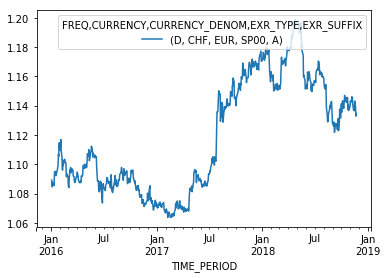

In [20]:
%matplotlib inline
ts2.plot()